In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

=> 1 dans  Pregnancies représente quoi  ?=> valeur mt3 25 ème personne
pourquoi on a besoin de describe?=> pour comprendre les données et les caractéristiques
avanet d'exploiter les données , on doit savoir est ce que moyenne est trés elevé => base normalisé

In [ ]:
# Description des features et de la target
features = df.columns[:-1]  # Toutes les colonnes sauf la dernière (par défaut)
target = df.columns[-1]     # Supposons que la dernière colonne est la cible

In [ ]:
print("Features (Caractéristiques) :")
print(features)

Features (Caractéristiques) :
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [ ]:
print("\nTarget (Cible) :")
print(target)


Target (Cible) :
Outcome


In [ ]:
# Afficher les 5 premières lignes
print("\nLes 5 premières lignes du dataset :")
print(df.head())


Les 5 premières lignes du dataset :
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Afficher le nombre de classes et le nombre d'exemples par classe
classes = df[target].value_counts()
print("\nNombre de classes :", len(classes))
print("\nNombre d'exemples par classe :")
print(classes)


Nombre de classes : 2

Nombre d'exemples par classe :
Outcome
0    500
1    268
Name: count, dtype: int64


on a datset non équilibré , on prond ligne de 1 et créer la rassemblence dans ligne de 0

**Exercice :
1)création de des modèles de: naive baise /gausiian NB/logestisc regression/SVM**
2)-pour chaue model donne matirce de confusion
3)pour matirce de confusion affiche le rapport
4)courbe de précision pour train et test => test de overfittin et courbe et d''erreur  pour train et test
5)determiner le meilleur model
-split et test
**

# **Méthode d'équilibrage: importation des bibliothèques**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, accuracy_score
import matplotlib.pyplot as plt


# **Chargement de donnés**

In [ ]:
X = df[features]  # Feature matrix
y = df[target]    # Target vector

In [ ]:
# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


# **défifnition de modèle d'entraianemt**

In [ ]:
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True)  # pour générer les courbes de précision
}
results = {}


# **Evaluation**
**Matrice  confusion is table that summarizes the

---

performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives.**

**Explication**
#cm[0, 0] correspond aux True Negatives (TN) : nombre de fois où la classe 0 a été correctement prédite comme classe 0.
#cm[0, 1] correspond aux False Positives (FP) : nombre de fois où la classe 0 a été incorrectement prédite comme classe 1.
#cm[1, 0] correspond aux False Negatives (FN) : nombre de fois où la classe 1 a été incorrectement prédite comme classe 0.
#cm[1, 1] correspond aux True Positives (TP) : nombre de fois où la classe 1 a été correctement prédite comme classe 1.

=== Naive Bayes ===
Confusion Matrix:
 [[79 20]
 [16 39]]
Prédit : Classe 0	Prédit : Classe 1
Vrai : Classe 0	 79 		 20
Vrai : Classe 1	 16 		 39

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



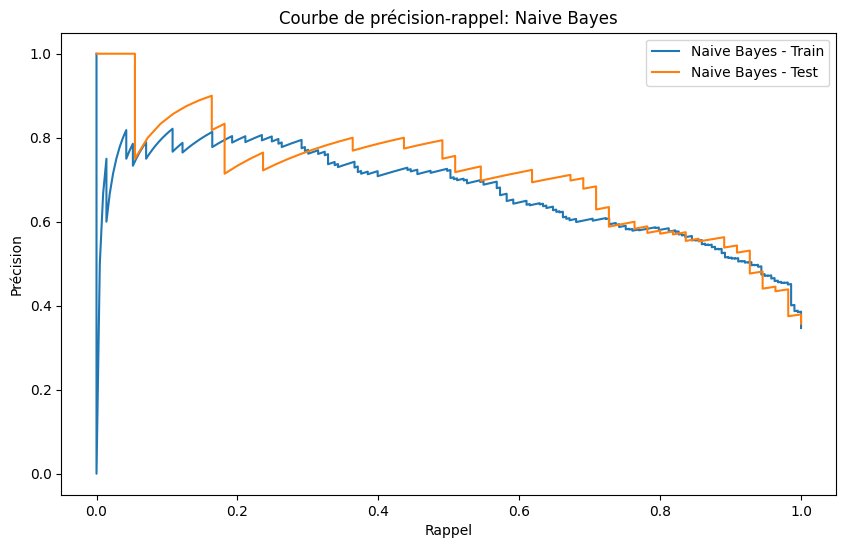

Train Error: 0.2476, Test Error: 0.2338
=== Logistic Regression ===
Confusion Matrix:
 [[78 21]
 [18 37]]
Prédit : Classe 0	Prédit : Classe 1
Vrai : Classe 0	 78 		 21
Vrai : Classe 1	 18 		 37

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


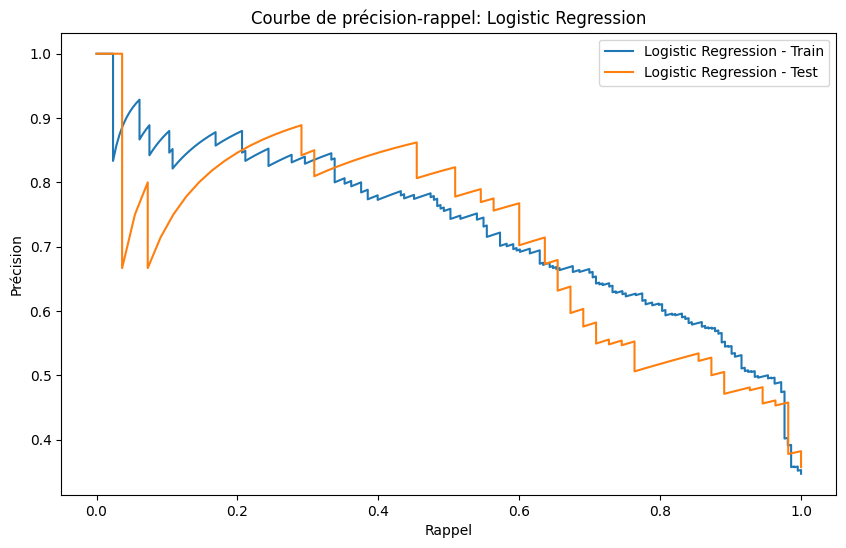

Train Error: 0.2296, Test Error: 0.2532
=== SVM ===
Confusion Matrix:
 [[87 12]
 [24 31]]
Prédit : Classe 0	Prédit : Classe 1
Vrai : Classe 0	 87 		 12
Vrai : Classe 1	 24 		 31

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



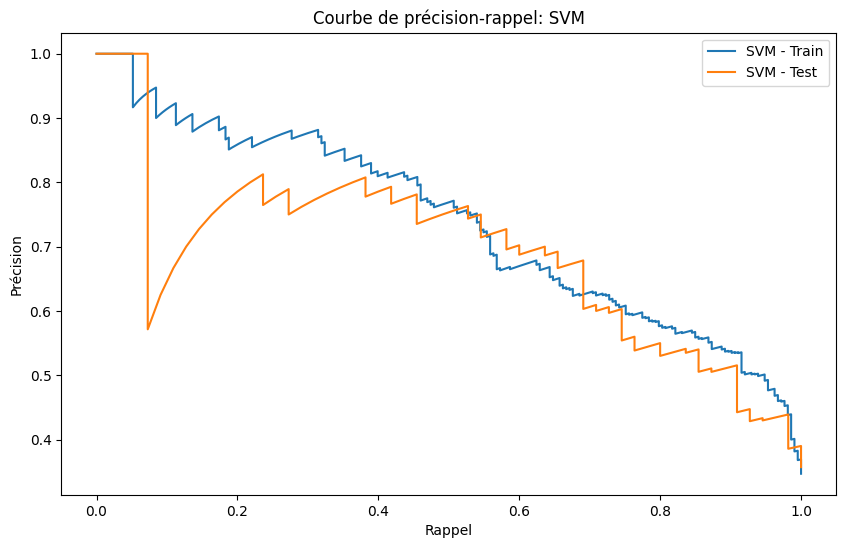

Train Error: 0.2313, Test Error: 0.2338


In [ ]:
#Looping through Models (ils sont mis dans un dictionary)
for name, model in models.items():
    print(f"=== {name} ===")

    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    y_pred_train = model.predict(X_train) #The features (input variables) of the training dataset.
    y_pred_test = model.predict(X_test) #feature of the target
    # Compter le nombre de zéros dans test

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred_test)
    print("Confusion Matrix:\n", cm)
    # Affichage formaté
    print("Prédit : Classe 0\tPrédit : Classe 1")
    print("Vrai : Classe 0\t", cm[0, 0], "\t\t", cm[0, 1])
    print("Vrai : Classe 1\t", cm[1, 0], "\t\t", cm[1, 1])
    print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

    # Courbes de précision et de rappel
    y_prob_train = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)
    y_prob_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    precision_train, recall_train, _ = precision_recall_curve(y_train, y_prob_train)
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_prob_test)
    # Micro precision score

    # Tracer les courbes
    plt.figure(figsize=(10, 6))
    plt.plot(recall_train, precision_train, label=f'{name} - Train')
    plt.plot(recall_test, precision_test, label=f'{name} - Test')
    plt.title(f'Courbe de précision-rappel: {name}')
    plt.xlabel('Rappel')
    plt.ylabel('Précision')
    plt.legend()
    plt.show()

    # Calcul des erreurs de train
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    print(f"Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

    results[name] = {
        "train_error": train_error,
        "test_error": test_error,
        "confusion_matrix": cm,
        "accuracy_test": accuracy_score(y_test, y_pred_test)
    }



# **Comparer les modèles pour déterminer le meilleur**

In [ ]:
best_model = max(results, key=lambda k: results[k]["accuracy_test"])
print(f"Meilleur modèle basé sur la précision sur le test: {best_model}")


Meilleur modèle basé sur la précision sur le test: Naive Bayes


# **Vérification de l'overfitting (optionnel) : Tracez les erreurs d'entraînement et de test ensemble pour visualiser le surajustement**

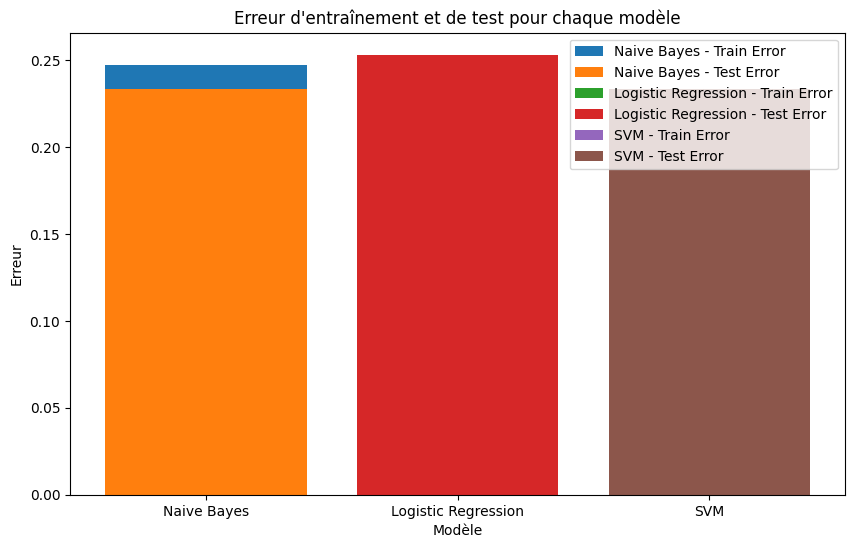

In [ ]:
plt.figure(figsize=(10, 6))
for name in results.keys():
    plt.bar(name, results[name]["train_error"], label=f"{name} - Train Error")
    plt.bar(name, results[name]["test_error"], label=f"{name} - Test Error")
plt.title("Erreur d'entraînement et de test pour chaque modèle")
plt.xlabel("Modèle")
plt.ylabel("Erreur")
plt.legend()
plt.show()


#**Partie validation =>chercher les bon paramètres **